In [7]:
import lowess
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt

In [4]:
def poisson(x):
    return -(-x * x) * np.exp(-x)

In [5]:
def generate_data(x1, x2):
    return -(poisson(x1) + x2 ** (-3 / 2))


n = 10
x1 = np.linspace(1, 5, n)
x2 = np.linspace(1, 8, n)

X1, X2 = np.meshgrid(x1, x2)

y_real = generate_data(X1, X2)
y = generate_data(X1, X2) + [np.random.normal(0, 0.07, n) for i in range(10)]

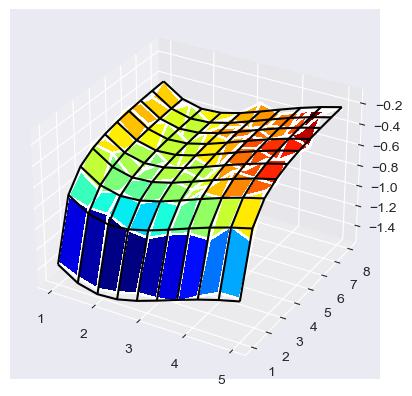

In [8]:
ax = plt.axes(projection='3d')

# ax.view_init(0, 90)
ax.plot_wireframe(X1, X2, y_real, color='black')
ax.plot_surface(X1, X2, y, cmap=cm.jet,
                linewidth=1, antialiased=False)

In [32]:
df = pd.Series(x2)
df

0    1.000000
1    1.777778
2    2.555556
3    3.333333
4    4.111111
5    4.888889
6    5.666667
7    6.444444
8    7.222222
9    8.000000
dtype: float64

In [25]:
y_ser = pd.Series(y[0])
y_ser

0   -1.347131
1   -1.433208
2   -1.486432
3   -1.459737
4   -1.402891
5   -1.391061
6   -1.364027
7   -1.246757
8   -1.150369
9   -1.143027
dtype: float64

In [33]:
lowess.lowess(df, y_ser)

LowessError: {'LowessError': 'The least squares regression failed.'}